# NOTEBOOK 4: Clasificación

En esta Notebook vamos a empezar a entrar en el mundo actual del aprendizaje automatico (ML) para clasificar datos. Vamos a introducir un numero de diferentes algoritmos de clasificacion y vamos a aplicarlos a nuestro conjunto de datos de vinos. 

# Contenido

* Regresión Logística
* Data Splitting
* Data Standardization
* Multiple Logistic Regression
* Performance Metrics for Classification
* Árbol de decisión


# Regresión Logística

La regresión logística es una técnica estadística que es un método básico de clasificación. Se basa en la función logística, que es una forma general de la función sigmoidea. Es una curva en forma de "S" que puede tomar cualquier número de valor real en el eje x, y valores entre 0 y 1 en el eje y. Se puede utilizar para clasificar entre dos clases (0 y 1). El valor de y expresa la probabilidad de que ocurra la clase 1.

Primero, cargamos las librerias y los datos.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df['hue']='1'

df2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df2['hue']='0'

df_wine = pd.concat([df, df2], ignore_index=True)

Para demostrarlo, tomaremos el conjunto de datos para vinos tintos y extraeremos la cantidad de alcohol para las calidades 3 y 8. Luego, convertimos estas clases en 0 y 1 para ajustarlas mediante una regresión logística.

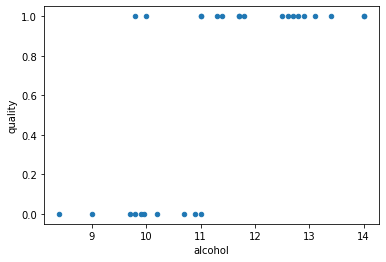

In [ ]:
df_LR = df.loc[(df['quality'] == 3 ) | (df['quality'] == 8 ), ['alcohol','quality']]

df_LR.loc[df_LR.quality == 3, 'quality'] = 0
df_LR.loc[df_LR.quality == 8, 'quality'] = 1

df_LR.plot.scatter(x = 'alcohol', y = 'quality')

Ajustaremos los datos usando seaborn con la función regplot, que nos permite visualizar cómo se ajustan los datos a esta regresión. Para obtener más información, visite la [documentación](https://seaborn.pydata.org/generated/seaborn.regplot.html).

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


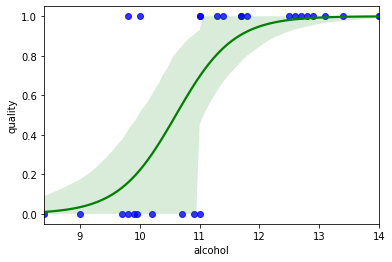

In [ ]:
X = df_LR[['alcohol']]
y = df_LR.quality
sns.regplot(X, y, logistic=True, scatter_kws={'color': 'blue'}, line_kws={'color': 'green'})

Ahora hagamos un modelo de regresión logística usando **scikit learn**. Tenemos que evitar la regularización para obtener resultados similares a los mostrados con **seaborn**. La regularización se considera el efecto de valores atípicos en una regresión y se define mediante la constante C. En este caso, usamos un valor de $ 10 ^ 9 $, por lo que este valor alto desactiva la regularización. Para obtener más información, visite la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 'sklearn.linear_model.LogisticRegression').

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df_LR[['alcohol']]
y = df_LR.quality

model = LogisticRegression(C = 1e9)
model.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Ahora creamos una función sigmoidea para trazar el modelo de regresión logística y luego lo graficamos junto con los datos.

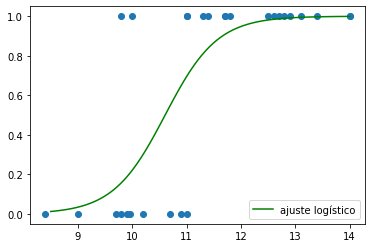

In [ ]:
from scipy.special import expit
x_test = np.linspace(8.5,14.0,100)
# predigo y_test data con el modelo de regresión logística
y_test = x_test * model.coef_ + model.intercept_
 
sigmoid = expit(y_test)
plt.scatter(X,y)
 

plt.plot(x_test,sigmoid.ravel(),c="green", label = "ajuste logístico")
plt.legend(loc="lower right")

# Data Splitting

En general, los datos se dividen en dos grupos antes de generar un modelo. Estos grupos se denominan conjuntos de entrenamiento y prueba. El conjunto de entrenamiento se utiliza para desarrollar modelos y seleccionar los parámetros que se ajustan a los datos. El conjunto de prueba se utiliza para valorar el rendimiento del modelo con datos invisibles. La forma más común es dividir los datos al azar.

Dividimos el conjunto de datos usando la función **train_test_split** de **scikit learn**. El conjunto de entrenamiento es el 67% de los datos y el conjunto de prueba es el 33% (lo hemos especificado deliberadamente de esa manera en los parámetros). El parámetro `random_state` controla la mezcla aplicada a los datos antes de aplicar la división. Para obtener más información, visite la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 'sklearn.model_selection.train_test_split').


In [ ]:
from sklearn.model_selection import train_test_split

X = df_wine.drop(['quality', 'hue'], axis=1)
y = df_wine['hue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Data Standardization

La estandarización es un método para transformar variables que difieren en media y desviación en valores comparables. Este proceso consiste en restar las medias de cada característica y luego dividir por las desviaciones estándar de la característica. Muchos algoritmos de aprendizaje automático asumen que todas las características se centran alrededor de cero y tienen aproximadamente la misma varianza, por lo que se necesita estandarización.

En este caso, usaremos la función **StandardScaler**, que primero necesita ajustar los datos para determinar la media y la desviación estándar y luego transformar los datos en una forma estandarizada. Hay otros procesos de estandarización. Para obtener más información, visite la [documentación](https://scikit-learn.org/stable/modules/preprocessing.html 'Preprocessing data').

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Regresión Logística Multiple

En este caso, utilizaremos todas las funciones con regresión logística para clasificar entre vino blanco y tinto.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

lr = LogisticRegression(random_state=0) #Se proporciona el parámetro random_state para controlar el generador de números aleatorios, este se utiliza siempre que la aleatorización forme parte de un algoritmo de Scikit-learn.
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Probaremos qué tan buena es la predicción del modelo para clasificar los datos con los que no se entrenó. Obtendremos métricas de rendimiento de esta comparación. En la siguiente sección, los analizaremos detenidamente.

In [ ]:
y_pred = lr.predict(X_test)

print("Score de precisión: " + str(accuracy_score(y_test, y_pred)))
print("\nMatriz de confusión: \n" + str(confusion_matrix(y_test, y_pred)))
print("\nReporte de clasificación: \n" + str(classification_report(y_test, y_pred)))

Score de precisión: 0.9888111888111888

Matriz de confusión: 
[[1577   11]
 [  13  544]]

Reporte de clasificación: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1588
           1       0.98      0.98      0.98       557

    accuracy                           0.99      2145
   macro avg       0.99      0.98      0.99      2145
weighted avg       0.99      0.99      0.99      2145



#Metricas de rendimiento para clasificación
Las métricas son los valores que guían la decisión en el aprendizaje automático. Por ejemplo, elegir qué modelo funciona mejor o qué parámetros mejoran un modelo midiendo y comparando entre diferentes casos. En este apartado vamos a analizar algunas de las métricas más utilizadas para la tarea de clasificación.

La precisión en este contexto de problemas de clasificación es el número de predicciones correctas sobre la cantidad total de predicciones. Esta métrica es útil cuando las clases a clasificar están aproximadamente equilibradas. Se espera que la precisión sea mejor en el conjunto de entrenamiento que en el de prueba.

In [ ]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Precisión en grupo entrenamiento: {:.3f}'.format(train_accuracy), 
      'Precisión en grupo testeo: {:.3f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Precisión en grupo entrenamiento: 0.995
Precisión en grupo testeo: 0.989


La Matriz de confusión se utiliza para visualizar el desempeño en un problema de clasificación de dos o más tipos de clases. Para un caso binario como nuestro, comparamos los valores “Real” frente a los “Predichos” y obtenemos 4 casos:

* TP - Verdadero Positivo
* TN - Verdadero negativo
* FP - Falso positivo
* FN - Falso negativo

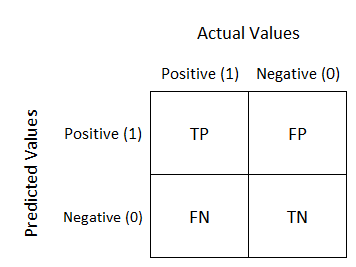

Grafiquemos la matriz de confusión usando matplotlib.

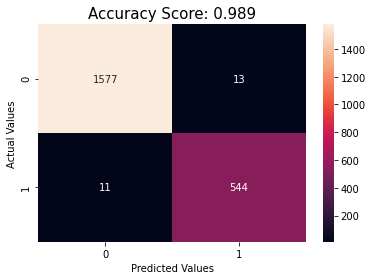

In [ ]:
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(predictions, y_test)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

La precisión es una métrica que informa cuántas instancias de predicción positiva fueron realmente positivas. 
$$ Precision = TP / (TP + FP) $$

In [ ]:
from sklearn.metrics import precision_score

print("precisión score: ",  precision_score(y_test, predictions, average='micro'))

precisión score:  0.9888111888111888


El Recall es una métrica que informa cuántas instancias se identificaron correctamente de todas las clases positivas.
$$ Recall = TP / (TP + FN) $$

In [ ]:
from sklearn.metrics import recall_score

print("recall score: ",  recall_score(y_test, predictions, average='micro'))


recall score:  0.9888111888111888


El F1-Score es una métrica que muestra la media armónica de precisión y Recall.
 $$ F1-Score = (2 \cdot Recall \cdot Precision) / (Recall + Precision) $$

In [ ]:
from sklearn.metrics import f1_score

precision_s = precision_score(y_test, predictions,average='micro')
recall_s    = recall_score(y_test, predictions, average='micro')


print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))

F1_score     :  0.9888111888111888


# Árbol de decisión

Un árbol de decisión es una técnica no lineal que divide el conjunto de datos en subconjuntos según el valor de una característica. Este paso se repite de forma recursiva en cada nuevo subconjunto hasta que se alcanzan algunos criterios. Por ejemplo, cada punto del subconjunto tiene el mismo valor de la variable objetivo o se alcanza una profundidad máxima. La elección de la característica y el valor a dividir se basa en reducir la entropía objetivo dividiéndola en subconjuntos puros. Para obtener más información, visite la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 'sklearn.tree.DecisionTreeClassifier').

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(y_test, y_pred)))

Accuracy score: 0.9724941724941725

Confusion matrix: 
[[1564   24]
 [  35  522]]

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1588
           1       0.96      0.94      0.95       557

    accuracy                           0.97      2145
   macro avg       0.97      0.96      0.96      2145
weighted avg       0.97      0.97      0.97      2145



Una característica interesante de los árboles de decisión es que podemos generar un esquema que nos muestre cómo se tomaron las decisiones. Para obtener más información, visite la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html 'sklearn.tree.plot_tree').

[Text(558.0, 380.52, 'X[4] <= 0.149\nentropy = 0.794\nsamples = 4352\nvalue = [3310, 1042]'),
 Text(279.0, 271.8, 'X[6] <= -1.102\nentropy = 0.197\nsamples = 3172\nvalue = [3075, 97]'),
 Text(139.5, 163.07999999999998, 'X[4] <= -0.239\nentropy = 0.915\nsamples = 103\nvalue = [34, 69]'),
 Text(69.75, 54.360000000000014, 'entropy = 0.792\nsamples = 42\nvalue = [32, 10]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.208\nsamples = 61\nvalue = [2, 59]'),
 Text(418.5, 163.07999999999998, 'X[6] <= -0.43\nentropy = 0.075\nsamples = 3069\nvalue = [3041, 28]'),
 Text(348.75, 54.360000000000014, 'entropy = 0.298\nsamples = 379\nvalue = [359, 20]'),
 Text(488.25, 54.360000000000014, 'entropy = 0.029\nsamples = 2690\nvalue = [2682, 8]'),
 Text(837.0, 271.8, 'X[6] <= -0.466\nentropy = 0.72\nsamples = 1180\nvalue = [235, 945]'),
 Text(697.5, 163.07999999999998, 'X[7] <= -0.638\nentropy = 0.127\nsamples = 856\nvalue = [15, 841]'),
 Text(627.75, 54.360000000000014, 'entropy = 0.696\nsamples = 16\nv

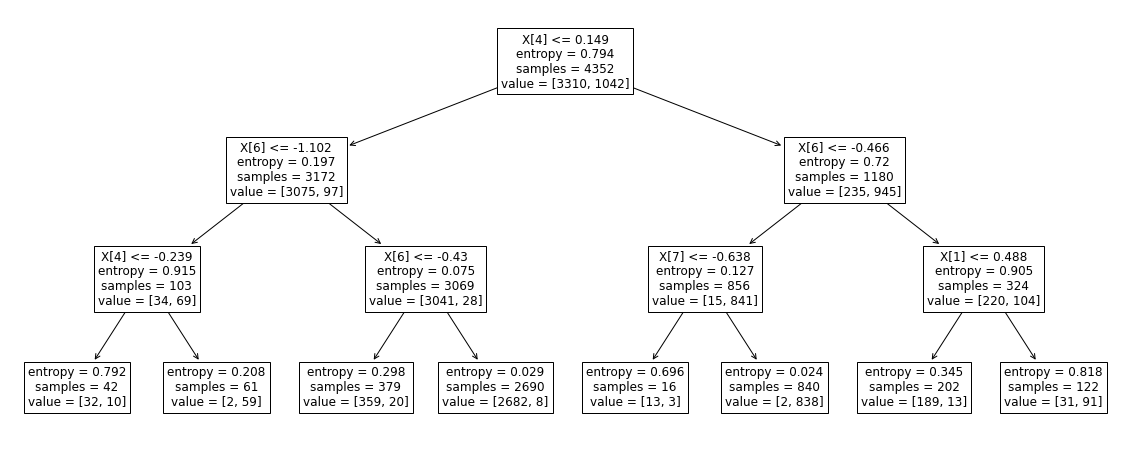

In [ ]:
fig = plt.subplots(figsize=(20, 8))
tree.plot_tree(dt, fontsize=12)